In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [3]:
df=pd.read_csv('diabetes-3.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

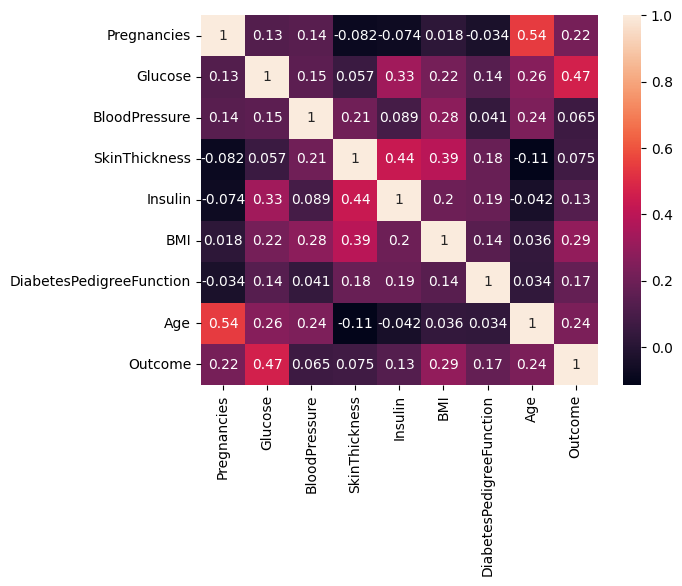

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
kernel=['linear','poly','rbf','sigmoid']
accuracy=[]
for k in kernel:
    model=SVC(kernel=k)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    accuracy.append(accuracy_score(ypred,ytest))
accuracy

[0.7532467532467533, 0.7597402597402597, 0.7662337662337663, 0.551948051948052]

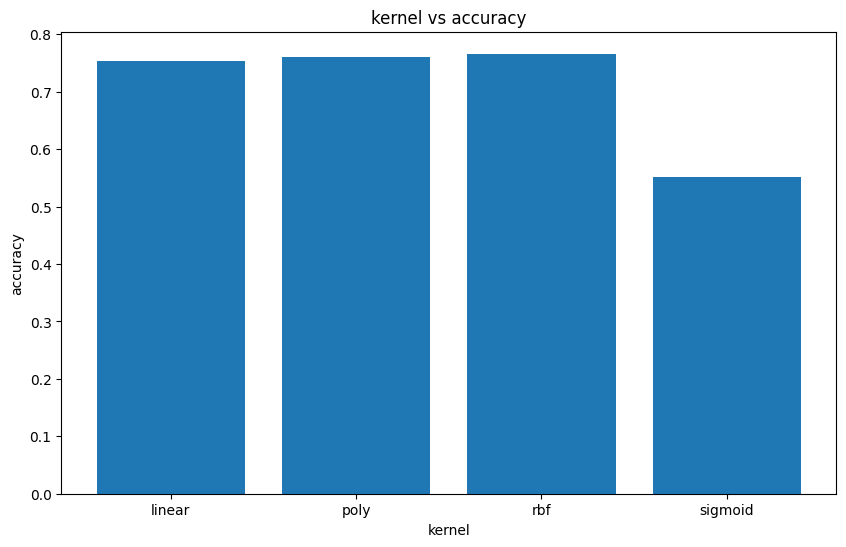

In [12]:
plt.figure(figsize=(10,6))
plt.bar(kernel,accuracy)
plt.title('kernel vs accuracy')
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.show()

In [13]:
model=SVC(kernel='rbf')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ypred,ytest))
print(classification_report(ypred,ytest))

0.7662337662337663
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       111
           1       0.56      0.72      0.63        43

    accuracy                           0.77       154
   macro avg       0.72      0.75      0.73       154
weighted avg       0.79      0.77      0.77       154



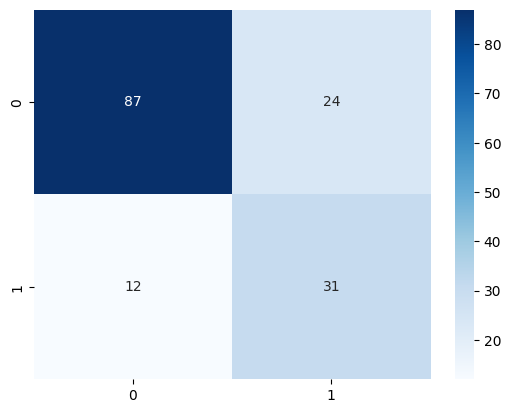

In [14]:
cm=confusion_matrix(ypred,ytest)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.show()

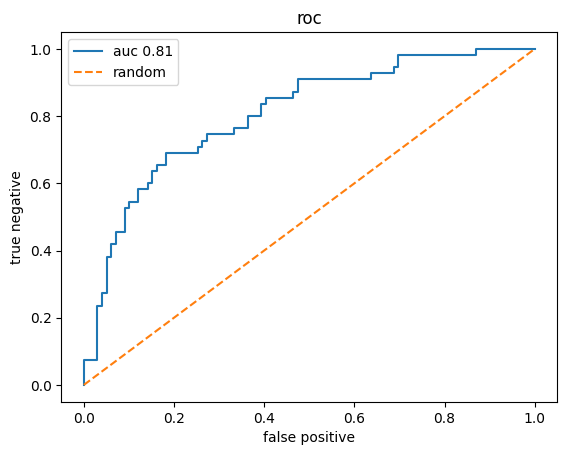

In [16]:
y_pred_proba=model.decision_function(xtest)
fpr,tpr,_=roc_curve(ytest,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'auc {roc_auc:.2f}')
plt.plot([0,1],[0,1],label='random',linestyle='--')
plt.xlabel('false positive')
plt.ylabel('true negative')
plt.title('roc')
plt.legend()
plt.show()